# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')



In [2]:
medical.shape


(1338, 8)

In [3]:
medical.head()


,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

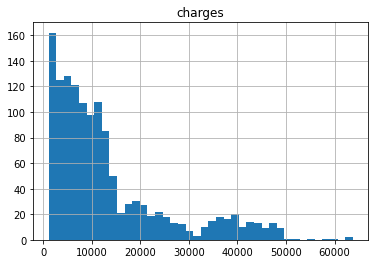

In [3]:
# _ = plt.plot('hist','charges',data=medical)

medical.hist('charges',bins=40)

plt.show()

In [4]:
# summary stats
med_mean = np.mean(medical.charges)
med_std = np.std(medical.charges)

med_mean, med_std



(13270.422265141257, 12105.484975561605)

The data has a long right tail and no left to, so this data set is as far from a gausian distribution as possible

In [5]:
med_std=np.std(medical.charges,ddof=1)
med_std

12110.011236693994

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ The standard deviation is greater than the value by which we want to know if there is a change by so I do not think we can use this data to answer the question. 

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ as we are only concered with if the price change is below one value we can use a one-sided confidence interval. 



In [14]:
# import stats
import scipy
scipy.stats.norm.ppf(0.95,loc =med_mean,scale=med_std )


33189.61817024046

In [10]:
# critical value  =  t score for 95% conf and 1337 df 
from scipy import stats

print (stats.t.ppf(.95, df= 1337))



1.6459941145571317


In [12]:
#margin of error  = t (a,df ) * s/sqrt(n)
                # for one sided 

me =(stats.t.ppf(.95, df= 1337))* (med_std/np.sqrt(1338))

me



544.9350813250251

In [13]:
cofidence_interval = (med_mean-me,med_mean+me)
cofidence_interval



(12725.48718381623, 13815.357346466282)

In [15]:
help(scipy.stats.norm.ppf)


Help on method ppf in module scipy.stats._distn_infrastructure:

ppf(q, *args, **kwds) method of scipy.stats._continuous_distns.norm_gen instance
    Percent point function (inverse of `cdf`) at q of the given RV.
    
    Parameters
    ----------
    q : array_like
        lower tail probability
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    x : array_like
        quantile corresponding to the lower tail probability q.



In [16]:
help(scipy.stats.norm.cdf)

Help on method cdf in module scipy.stats._distn_infrastructure:

cdf(x, *args, **kwds) method of scipy.stats._continuous_distns.norm_gen instance
    Cumulative distribution function of the given RV.
    
    Parameters
    ----------
    x : array_like
        quantiles
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    cdf : ndarray
        Cumulative distribution function evaluated at `x`



In [9]:
help(scipy.stats.t.ppf)



Help on method ppf in module scipy.stats._distn_infrastructure:

ppf(q, *args, **kwds) method of scipy.stats._continuous_distns.t_gen instance
    Percent point function (inverse of `cdf`) at q of the given RV.
    
    Parameters
    ----------
    q : array_like
        lower tail probability
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    x : array_like
        quantile corresponding to the lower tail probability q.



In [ ]:
null is there is no difference between pay for the two groups 



The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [17]:
no_in = medical.loc[medical['insuranceclaim'] == 0 ]
no_in.info()
insur = medical.loc[medical.insuranceclaim == 1]
insur.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555 entries, 2 to 1336
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             555 non-null    int64  
 1   sex             555 non-null    int64  
 2   bmi             555 non-null    float64
 3   children        555 non-null    int64  
 4   smoker          555 non-null    int64  
 5   region          555 non-null    int64  
 6   charges         555 non-null    float64
 7   insuranceclaim  555 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 39.0 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 783 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             783 non-null    int64  
 1   sex             783 non-null    int64  
 2   bmi             783 non-null    float64
 3   children        783 non-null    int64  
 4   smoker        

In [18]:
df_no_in = len(no_in)-1
df_insur = len(insur)-1

numerator = (df_no_in*np.var(no_in))+(df_insur*np.var(insur))

denominator = len(no_in)+len(insur)-2


sp = np.sqrt(numerator/denominator)
sp

age                  13.953843
sex                   0.499723
bmi                   5.628061
children              1.099324
smoker                0.380504
region                1.104229
charges           11512.282899
insuranceclaim        0.000000
dtype: float64

In [24]:
df_no_in = len(no_in)-1
df_insur = len(insur)-1

numerator = (df_no_in*np.var(no_in.charges))+(df_insur*np.var(insur.charges))

denominator = len(no_in)+len(insur)-2


sp = np.sqrt(numerator/denominator)
sp

11512.282899205744

In [28]:
## check variance of two samples 

np.var(no_in.charges),np.var(insur.charges)

(41482614.44965368, 197036140.77172482)

In [27]:
numerator = np.mean(no_in.charges)+ np.mean(insur.charges)

denominator = sp*np.sqrt((1/len(no_in.charges))+(1/len(insur.charges)))
t_stat = numerator/denominator
t_stat

39.52021163443274

In [34]:
# my calc was never going to be negative compared to the stats.ttest_ind 
numerator, denominator

(25245.350168843957, 638.7959255473335)

In [30]:
# cal the probability of t statistic caluclated 

scipy.stats.t.cdf(39.52,df=denominator)

1.0

In [31]:
stats.ttest_ind(a=no_in.charges,
                   b=insur.charges,
               equal_var=False)

Ttest_indResult(statistic=-13.298031957975649, pvalue=1.1105103216309125e-37)

In [40]:
stats.ttest_ind(a=insur.charges,
                   b=no_in.charges,
               equal_var=False)

Ttest_indResult(statistic=13.298031957975649, pvalue=1.1105103216309125e-37)

In [41]:
## probablity of t stat from .ttest_ind 

scipy.stats.t.cdf(13.298031957975649,df= numerator)

1.0

In [ ]:
#?? this means there is a 100% chance that the observed difference is in the distribution ??


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test